In [1]:
 import sklearn.datasets as dts
import numpy as np

import pandas as pd

In [2]:
data=dts.load_diabetes()

In [3]:
X=pd.DataFrame(data.data,columns=data.feature_names)

In [4]:
Y=pd.DataFrame(data.target,columns=["MEDV"]) #### a expliquer
Y=Y["MEDV"]

In [5]:
Y=(Y-np.mean(Y))/np.std(Y)

In [6]:
Y=Y.to_numpy() 

In [7]:
X=X.to_numpy() 

In [8]:
Y

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [9]:
from sklearn.model_selection import train_test_split as tts

In [10]:
Xtrain,Xtest,Ytrain,Ytest=tts(X,Y,test_size=20,random_state=40) ######### random_state ==== le choix sera aleatoire 


In [11]:
from sklearn.linear_model import SGDRegressor

In [12]:
from sklearn.linear_model import LinearRegression as LR

regL=LR()
regL.fit(Xtrain,Ytrain)

LinearRegression()

In [13]:
print(regL.coef_)

[  0.14852011  -3.3305229    6.6820164    4.70734841 -11.58192945
   6.8065852    1.52528418   2.53021013  10.01798256   0.5723796 ]


In [14]:
regL.intercept_


-0.003038205294102297

In [15]:
from sklearn.metrics import mean_squared_error as mse 
###erreur quadratique moyenne

erreur_RL=mse(Ytest,regL.predict(Xtest))
erreur_RL

1.1375869171535957

In [49]:
class RidgeRegressionGD:
    
    def __init__(self,epochs,learning_rate,alpha):
        
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0
        thetha = np.insert(self.coef_,0,self.intercept_)
        
        X_train = np.insert(X_train,0,1,axis=1)
        
        for i in range(self.epochs):
            thetha_der = np.dot(X_train.T,X_train).dot(thetha) - np.dot(X_train.T,y_train) + self.alpha*thetha
            thetha = thetha - self.learning_rate*thetha_der
        
        self.coef_ = thetha[1:]
        self.intercept_ = thetha[0]
    
    def predict(self,X_test):
        
        return np.dot(X_test,self.coef_) + self.intercept_

In [50]:
reg = RidgeRegressionGD(epochs=10,alpha=0.01,learning_rate=0.005)

In [51]:
reg.fit(Xtrain,Ytrain)

y_pred = reg.predict(Xtest)

print(reg.coef_)


[1.05979105 0.94174887 1.42710133 1.2947056  0.98827967 0.96893843
 0.68390778 1.23021188 1.36675998 1.19147432]


In [65]:
lmds=np.logspace(-4,4,50) ####pour les valeur de lambda ou bien alpha generer de 1à ala puissance -4 jusqu'a 10 a la puissance 4
erreurs=[]
ws=[]

#reg=Ridge()
reg= RidgeRegressionGD(epochs=50,alpha=0.001,learning_rate=0.005)
emin =1000
w_optx=[]



for lm in lmds:
  reg.alpha=lm
  reg.fit(Xtrain,Ytrain)
  e=mse(Ytest,reg.predict(Xtest))
  erreurs.append(e)
  ws.append(reg.coef_)
  if(e<emin):
    emin=e
    w_optx=reg.coef_

In [66]:
 w_optx

array([ 1.14474169,  0.59459708,  2.75211437,  2.16238337,  0.77435765,
        0.67932869, -0.24073893,  1.79177389,  2.44580517,  1.65299584])

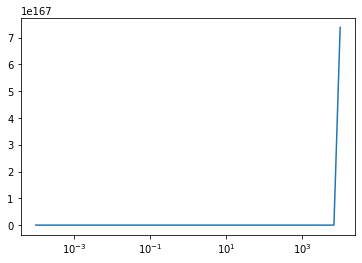

In [67]:
import matplotlib.pyplot as ppt

f=ppt.gca()
f.plot(lmds,erreurs)
f.set_xscale('log')